<a href="https://colab.research.google.com/github/theKerimKerimov/My_Projects/blob/main/PYTHON_13_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Загружаем CSV-файл с данными об оттоке клиентов банка
# Указываем путь к файлу и разделитель столбцов (запятая)
churn_data = pd.read_csv('/content/drive/MyDrive/Skillfactory/PYTHON-13. Визуализация данных/data/churn.csv', sep=',')

# Создаем копию исходного DataFrame, чтобы не менять оригинальные данные
churn_df = churn_data.copy()

# Удаляем столбец 'RowNumber', так как он содержит только порядковые номера и не нужен для анализа
churn_df = churn_df.drop(columns=['RowNumber'])

# Отображаем первые 5 строк итоговой таблицы
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

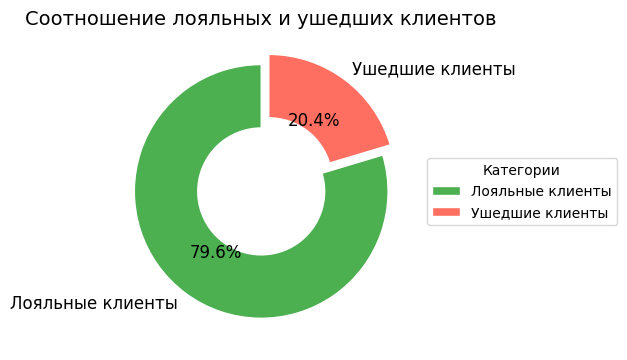

In [20]:
import matplotlib.pyplot as plt

# Считаем количество лояльных и ушедших клиентов
churn_df_exited = churn_df['Exited'].value_counts()

# Создаём фигуру и ось для построения круговой диаграммы
fig, ax = plt.subplots(figsize=(6, 6))

# Строим круговую диаграмму
wedges, texts, autotexts = ax.pie(
    churn_df_exited,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],  # Подписи сегментов
    autopct='%.1f%%',                                # Формат отображения процентов
    startangle=90,                                   # Начальный угол для первого сегмента
    explode=[0, 0.1],                                # Смещение второго сегмента (ушедшие клиенты)
    colors=['#4CAF50', '#FF6F61'],                   # Цвета сегментов
    wedgeprops=dict(width=0.5, edgecolor='w'),      # Настройка внешнего вида сегментов
    textprops=dict(color="black", fontsize=12)       # Настройка текста
)

# Заголовок диаграммы
ax.set_title('Соотношение лояльных и ушедших клиентов', fontsize=14)

# Добавляем легенду справа от диаграммы
ax.legend(
    wedges,
    ['Лояльные клиенты', 'Ушедшие клиенты'],
    title="Категории",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Автоматически подгоняем расположение элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Приблизительное соотношение ушедших клиентов к оставшимся составляет 1:4. Доля ушедших клиентов составляет 20.4%, доля лояльных клиентов составляет 79.6%, отсюда мы можем сделать вывод, что большинство клиентов компании — лояльные, однако каждый пятый клиент уходит. Это значительный показатель, который требует анализа причин оттока и разработки стратегии удержания клиентов.

#**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

In [21]:
# Отбираем клиентов, у которых баланс больше 2500
balance_2500 = churn_df[churn_df['Balance'] > 2500]

# Выводим первые 5 строк отфильтрованного датафрейма
display(balance_2500.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Fair
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Very_Poor


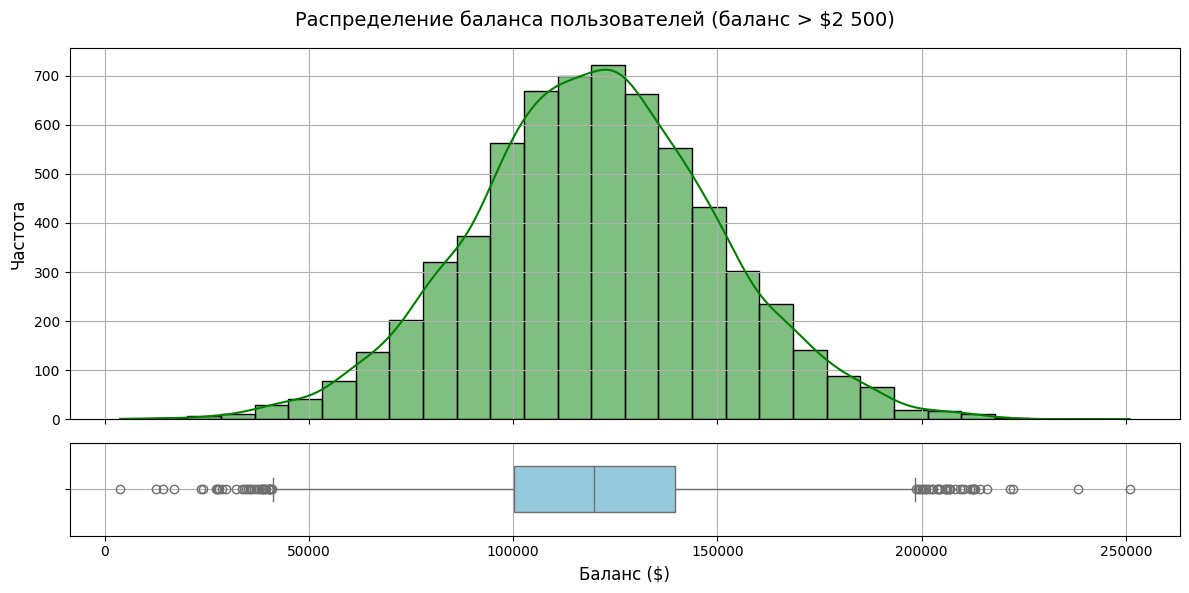

In [22]:
# Импорт необходимых библиотек визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Создание фигуры и двух подграфиков: гистограмма + коробчатая диаграмма (boxplot)
fig, (histplot_2500, boxplot_2500) = plt.subplots(
    nrows=2,                          # два ряда графиков
    sharex=True,                      # общий ось X
    figsize=(12, 6),                  # размер фигуры
    gridspec_kw={"height_ratios": [4, 1]}  # соотношение высоты между графиками
)

# Построение гистограммы распределения баланса
sns.histplot(
    data=balance_2500['Balance'],     # выборка по балансу > 2500
    bins=30,                          # количество столбцов гистограммы
    kde=True,                         # добавление линии плотности KDE
    color='green',                    # цвет гистограммы
    ax=histplot_2500                  # ось, на которой будет рисоваться гистограмма
)
histplot_2500.set_ylabel('Частота', fontsize=12)  # подпись оси Y
histplot_2500.grid(True)                          # отображение сетки

# Построение коробчатой диаграммы (boxplot) по балансу
sns.boxplot(
    data=balance_2500,                # датафрейм с пользователями
    x='Balance',                      # переменная по оси X
    orient='h',                       # горизонтальная ориентация
    width=0.5,                        # толщина коробки
    color='skyblue',                  # цвет коробки
    ax=boxplot_2500                   # ось, на которой будет рисоваться boxplot
)
boxplot_2500.set_xlabel('Баланс ($)', fontsize=12)  # подпись оси X
boxplot_2500.grid(True)                            # отображение сетки

# Заголовок всей фигуры
fig.suptitle('Распределение баланса пользователей (баланс > $2 500)', fontsize=14)

# Автоматическая подстройка расположения графиков
plt.tight_layout()

# Отображение графика
plt.show()

Распределение балансов пользователей с суммой на счете более 2 500 долларов явно неравномерное. Основная масса клиентов имеет баланс в диапазоне от 100 000 до 140 000 долларов, причем пик распределения приходится примерно на 125 000 долларов, что указывает на наличие группы состоятельных пользователей. При этом присутствует значительное количество выбросов как с низкими, так и с чрезвычайно высокими значениями баланса (свыше 250 000 долларов), что может свидетельствовать о неоднородной структуре клиентской базы.

#**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

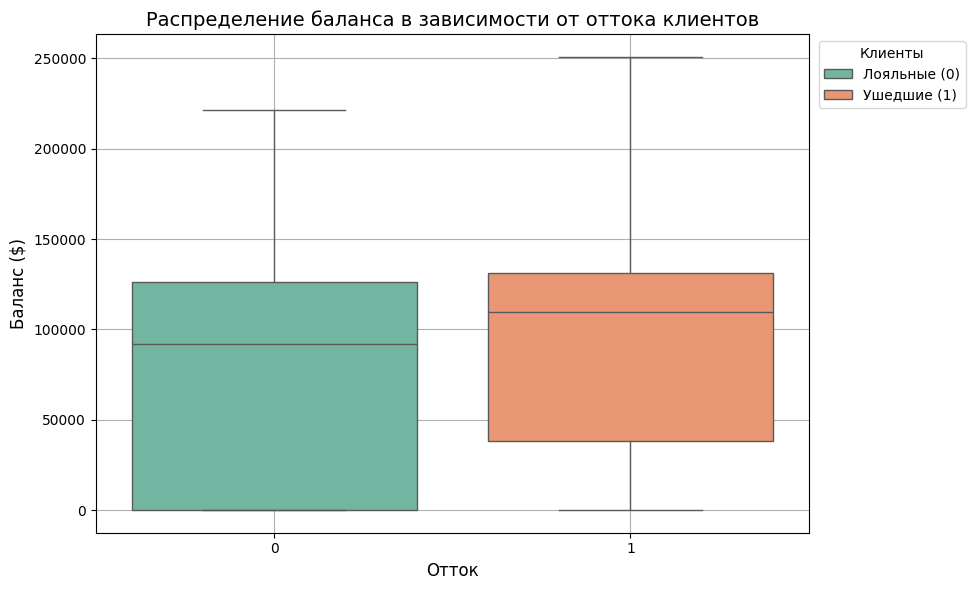

In [23]:
# Импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Установка размера всей фигуры
plt.figure(figsize=(10, 6))

# Построение boxplot: распределение баланса по признаку оттока клиентов
boxplot_balance_exited = sns.boxplot(
    data=churn_df,        # исходный DataFrame
    x='Exited',           # категория по оси X (0 — остались, 1 — ушли)
    y='Balance',          # числовая переменная по оси Y (баланс)
    hue='Exited',         # группировка по цвету на основе оттока
    palette='Set2'        # цветовая палитра
)

# Настройка заголовка и подписей осей
boxplot_balance_exited.set_title('Распределение баланса в зависимости от оттока клиентов', fontsize=14)
boxplot_balance_exited.set_xlabel('Отток', fontsize=12)
boxplot_balance_exited.set_ylabel('Баланс ($)', fontsize=12)

# Добавление сетки к графику
boxplot_balance_exited.grid(True)

# Получение и переопределение легенды
handles, labels = boxplot_balance_exited.get_legend_handles_labels()
boxplot_balance_exited.legend(
    handles=handles,
    labels=['Лояльные (0)', 'Ушедшие (1)'],     # явные подписи для категорий
    title='Клиенты',                            # заголовок легенды
    loc='upper right',                          # положение
    bbox_to_anchor=(1.23, 1)                    # смещение легенды за пределы графика
)

# Автоматическая подстройка расположения элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

Ушедшие клиенты (Exited = 1) в среднем имеют более высокий баланс, чем те, кто остался. Медиана баланса у ушедших выше. Разброс балансов у лояльных шире, но при этом медиана ниже — многие клиенты с более скромными счетами продолжают пользоваться услугами банка. Выбросы видны и у тех, и у других, но в группе ушедших больше клиентов с крупными суммами. Исходя из вышесказанного мы можем предположить, что ушедших клиентов могли не устраивать условия хранения или использования их средств — например, низкие проценты по накопительным счетам, отсутствие премиальных услуг или невыгодные комиссии. Лояльные клиенты часто имеют меньшие суммы и, возможно, просто не так требовательны к качеству сервиса или не рассматривают смену банка как актуальную. Банк теряет именно тех, кто мог бы быть самыми выгодными клиентами — это важный сигнал для анализа клиентского опыта и продуктовой линейки.

#**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

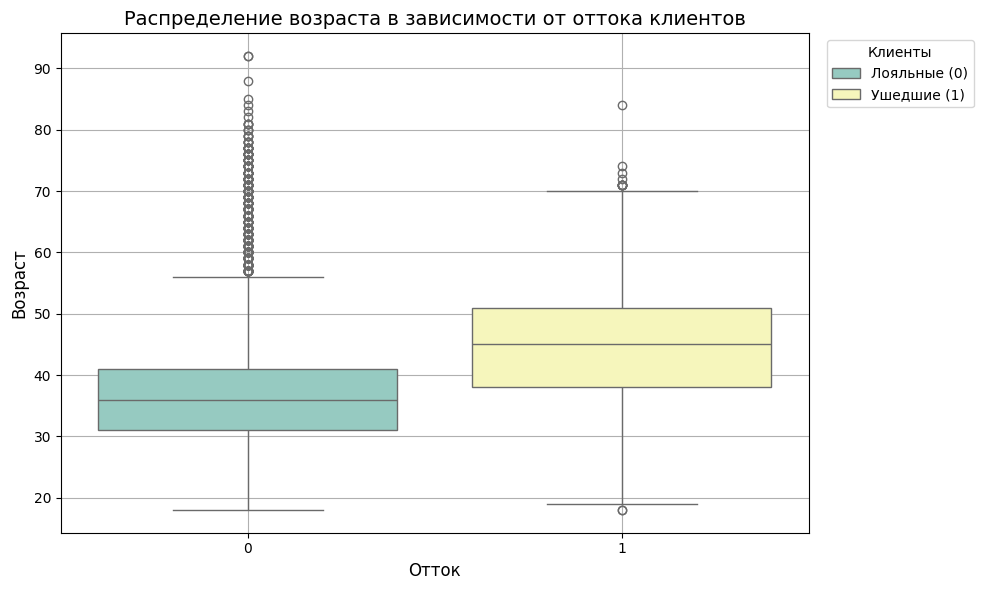

In [25]:
# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Установка размера всей фигуры
plt.figure(figsize=(10, 6))

# Построение boxplot-графика для анализа распределения возраста по оттоку клиентов
boxplot_age_exited = sns.boxplot(
    data=churn_df,        # DataFrame с данными клиентов
    x='Exited',           # переменная по оси X — отток (0 или 1)
    y='Age',              # переменная по оси Y — возраст клиента
    hue='Exited',         # цветовая группировка по оттоку
    palette='Set3'        # цветовая палитра графика
)

# Добавление заголовка и подписей осей
boxplot_age_exited.set_title(
    'Распределение возраста в зависимости от оттока клиентов',
    fontsize=14
)
boxplot_age_exited.set_xlabel('Отток', fontsize=12)
boxplot_age_exited.set_ylabel('Возраст', fontsize=12)

# Отображение сетки для лучшей читаемости
boxplot_age_exited.grid(True)

# Получение и настройка легенды
handles, labels = boxplot_age_exited.get_legend_handles_labels()
boxplot_age_exited.legend(
    handles=handles,
    labels=['Лояльные (0)', 'Ушедшие (1)'],   # Переименование значений
    title='Клиенты',                         # Заголовок легенды
    loc='upper right',
    bbox_to_anchor=(1.23, 1)                 # Смещение легенды за пределы графика
)

# Автоматическая корректировка расположения элементов графика
plt.tight_layout()

# Отображение итогового графика
plt.show()

Результаты визуализации возрастного распределения клиентов в зависимости от факта ухода свидетельствуют о наличии отчетливой тенденции: основная доля ушедших клиентов сосредоточена в возрастной группе 38–51 лет, что может указывать на специфические поведенческие или продуктовые ожидания данной когорты. Кроме того, среди лояльных клиентов зафиксировано большее количество потенциальных выбросов, что отражает более широкий возрастной разброс в этой категории и, вероятно, наличие субгрупп с различными мотивациями лояльности.

Для повышения эффективности удержания рекомендуется провести дополнительный сегментный анализ клиентов в возрасте от 38 до 51 года с целью выявления факторов, способствующих их оттоку. Это может включать оценку клиентского опыта, условий по продуктам и сервисной поддержки.

#**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

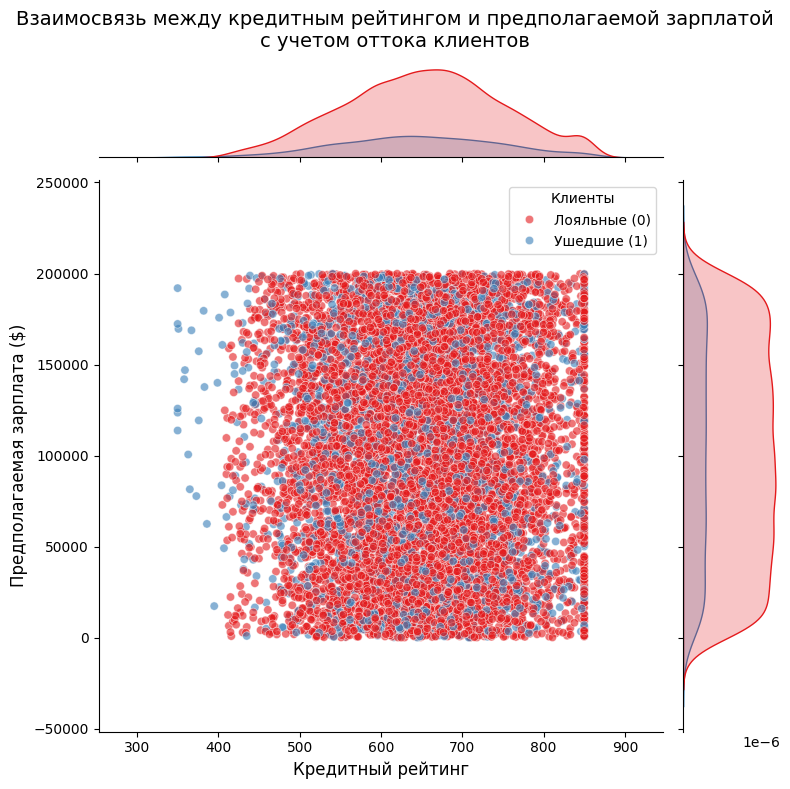

In [26]:
# Импорт необходимых библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Построение совместного графика (jointplot) для анализа зависимости между
# кредитным рейтингом (CreditScore) и предполагаемой зарплатой (EstimatedSalary)
# с учетом признака оттока клиентов (Exited)
jointplot_creditscore_estimatedsalary = sns.jointplot(
    data=churn_df,           # DataFrame с данными
    x='CreditScore',         # переменная по оси X — кредитный рейтинг
    y='EstimatedSalary',     # переменная по оси Y — предполагаемая зарплата
    hue='Exited',            # группировка по оттоку клиентов (0 — остался, 1 — ушел)
    palette='Set1',          # цветовая палитра
    height=8,                # размер графика
    alpha=0.6                # прозрачность точек
)

# Добавление заголовка к общей фигуре
jointplot_creditscore_estimatedsalary.fig.suptitle(
    'Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой\n'
    'с учетом оттока клиентов',
    fontsize=14
)

# Подписи осей основного графика
jointplot_creditscore_estimatedsalary.ax_joint.set_xlabel('Кредитный рейтинг', fontsize=12)
jointplot_creditscore_estimatedsalary.ax_joint.set_ylabel('Предполагаемая зарплата ($)', fontsize=12)

# Получение и настройка легенды
handles, labels = jointplot_creditscore_estimatedsalary.ax_joint.get_legend_handles_labels()
jointplot_creditscore_estimatedsalary.ax_joint.legend(
    handles=handles,
    labels=['Лояльные (0)', 'Ушедшие (1)'],
    title='Клиенты',
    loc='upper right'
)

# Автоматическая корректировка макета
plt.tight_layout()

# Отображение итогового графика
plt.show()

На основании визуализации не наблюдается выраженной взаимосвязи между кредитным рейтингом (CreditScore) и предполагаемой зарплатой (EstimatedSalary), независимо от факта оттока (Exited).
Клиенты как с высокими, так и с низкими кредитными рейтингами могут иметь как высокие, так и низкие доходы, а ушедшие и лояльные распределены приблизительно равномерно по всей области значений. Это указывает на отсутствие линейной или явной нелинейной зависимости между этими двумя признаками. Следовательно, для прогнозирования оттока данных признаков может быть недостаточно, и необходим анализ дополнительных факторов.

#**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

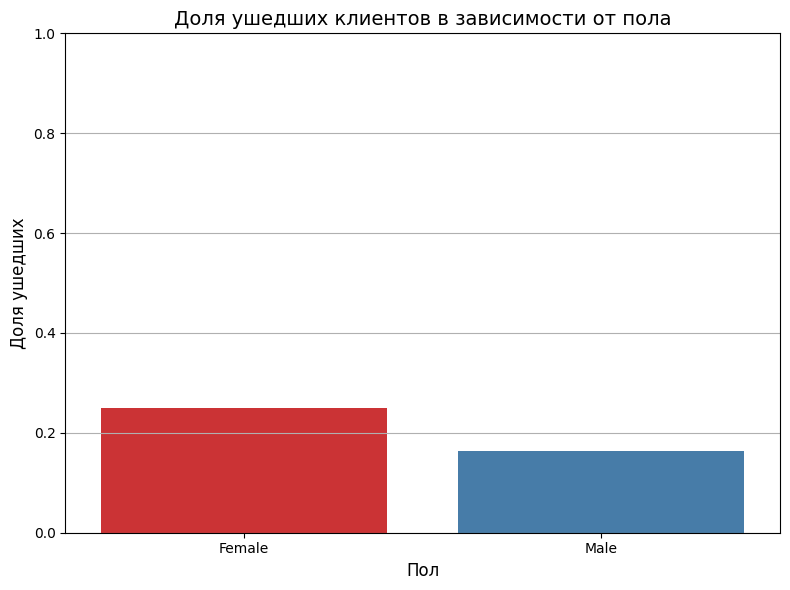

In [27]:
# Импортируем библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по полу и вычисляем среднее значение по признаку 'Exited'
# Это даст долю ушедших клиентов среди мужчин и женщин
gender_churn_rate = churn_df.groupby('Gender')['Exited'].mean().reset_index()

# Переименовываем столбцы для более понятного отображения на графике
gender_churn_rate.columns = ['Пол', 'Доля ушедших клиентов']

# Создаем фигуру для построения графика
plt.figure(figsize=(8, 6))

# Строим столбчатую диаграмму доли ушедших клиентов в зависимости от пола
gender_exited = sns.barplot(
    data=gender_churn_rate,      # DataFrame с данными
    x='Пол',                     # ось X — пол клиента
    y='Доля ушедших клиентов',   # ось Y — доля ушедших
    hue='Пол',                   # цветовая группировка также по полу
    palette='Set1'               # палитра цветов
)

# Добавляем заголовок и подписи к осям
gender_exited.set_title('Доля ушедших клиентов в зависимости от пола', fontsize=14)
gender_exited.set_ylabel('Доля ушедших', fontsize=12)
gender_exited.set_xlabel('Пол', fontsize=12)

# Устанавливаем лимиты по оси Y от 0 до 1 (доли)
gender_exited.set_ylim(0, 1)

# Включаем сетку только по оси Y для удобства чтения значений
gender_exited.grid(axis='y')

# Автоматически подгоняем расположение элементов
plt.tight_layout()

# Показываем итоговый график
plt.show()

Анализ показал, что доля ушедших клиентов среди женщин составляет около 25%, тогда как среди мужчин — около 18%. Это означает, что женщины покидают банк чаще, чем мужчины. Такое поведение может быть связано с разной чувствительностью к условиям лояльности и тарифам в зависимости от гендера. Банку следует провести дополнительное исследование потребностей женской аудитории и, при необходимости, адаптировать продуктовую линейку и сервис под их ожидания.

#**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

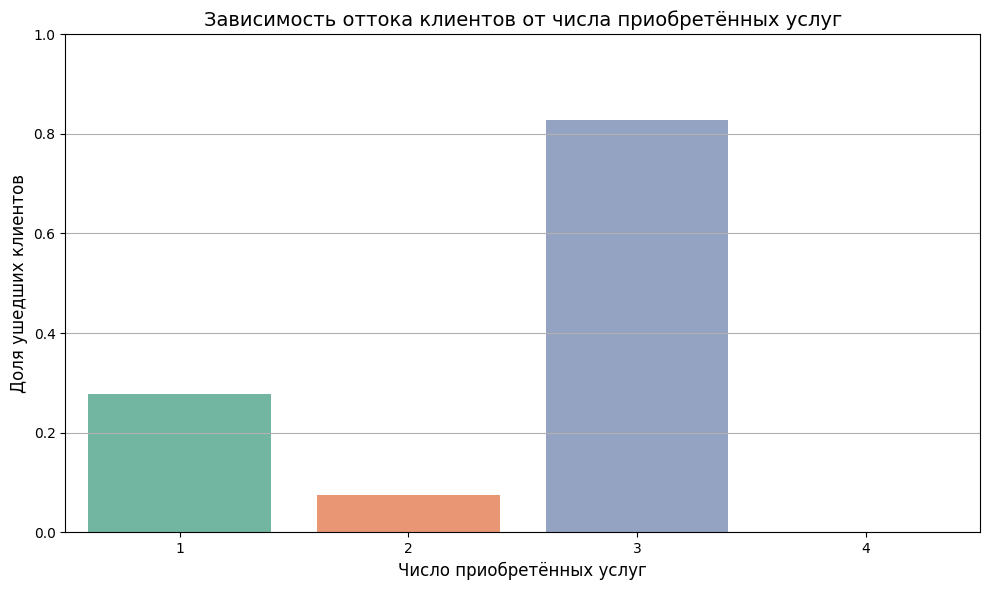

In [28]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по количеству продуктов и признаку оттока (Exited),
# считаем количество клиентов в каждой группе
churn_by_services = churn_df.groupby(['NumOfProducts', 'Exited']).size().unstack().reset_index()

# Добавляем столбец с долей ушедших клиентов
churn_by_services['Доля ушедших клиентов'] = churn_by_services[1] / (churn_by_services[0] + churn_by_services[1])

# Создаём фигуру с заданными размерами
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму зависимости доли оттока от количества приобретённых услуг
numofproducts_exited = sns.barplot(
    data=churn_by_services,            # Используем агрегированные данные
    x='NumOfProducts',                 # Ось X — количество услуг
    y='Доля ушедших клиентов',         # Ось Y — доля оттока
    hue='NumOfProducts',               # Цветовая разбивка по числу продуктов
    legend=False,                      # Отключаем легенду (цвет дублирует значения по оси X)
    palette='Set2'                     # Цветовая палитра
)

# Устанавливаем заголовок и подписи осей
numofproducts_exited.set_title('Зависимость оттока клиентов от числа приобретённых услуг', fontsize=14)
numofproducts_exited.set_xlabel('Число приобретённых услуг', fontsize=12)
numofproducts_exited.set_ylabel('Доля ушедших клиентов', fontsize=12)

# Ограничиваем ось Y значениями от 0 до 1 (доля)
numofproducts_exited.set_ylim(0, 1)

# Добавляем горизонтальную сетку для удобства восприятия
numofproducts_exited.grid(axis='y')

# Автоматически подгоняем элементы графика для предотвращения наложения
plt.tight_layout()

# Отображаем график
plt.show()

Отток среди клиентов, приобретающих 3 услуги составляет около 82% и этот показатель выглядит крайне высоким и может свидетельствовать о неудовлетворенности клиентов, которые приобрели три услуги. Возможно, они столкнулись с трудностями в использовании нескольких продуктов или не получили достаточной ценности от комплексного обслуживания. Это может быть связано с неудачной комбинацией услуг или высокими затратами, что привело к решению прекратить сотрудничество с банком. Этой группе следует уделить особое внимание. Нужно провести анализ причин, по которым клиенты с этим количеством услуг уходят в таком большом проценте. Возможно, стоит улучшить поддержку клиентов, пересмотреть цены на пакеты или предложить более выгодные условия обслуживания для клиентов с несколькими услугами.

Отток среди клиентов, приобретающих 1 услугу составляет около 28% и несмотря на то что отток в этой группе не столь высок, показатель все же выглядит значительным. Это может означать, что клиенты, использующие только одну услугу, не видят для себя достаточной ценности в предложениях банка и могут быть склонны к уходу. Возможно, банк не предоставляет дополнительных преимуществ или бонусов для таких клиентов, что снижает их лояльность. Банку стоит разработать стимулирующие предложения, например, бонусы или скидки на дополнительные услуги могут мотивировать клиентов попробовать другие продукты банка, повышая их удовлетворенность и снижая вероятность ухода.

Отток среди клиентов, приобретающих 2 услуги составляет 8% и это может означать, что банк находит более подходящий баланс между количеством услуг и удовлетворенностью клиентов, что делает эту группу более лояльной. Этой группе следует продолжать предлагать привлекательные условия. Это наиболее клиенты, и банк должен поддерживать их интерес, предлагая новые возможности для использования других услуг и усиливая долгосрочное сотрудничество.

#**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

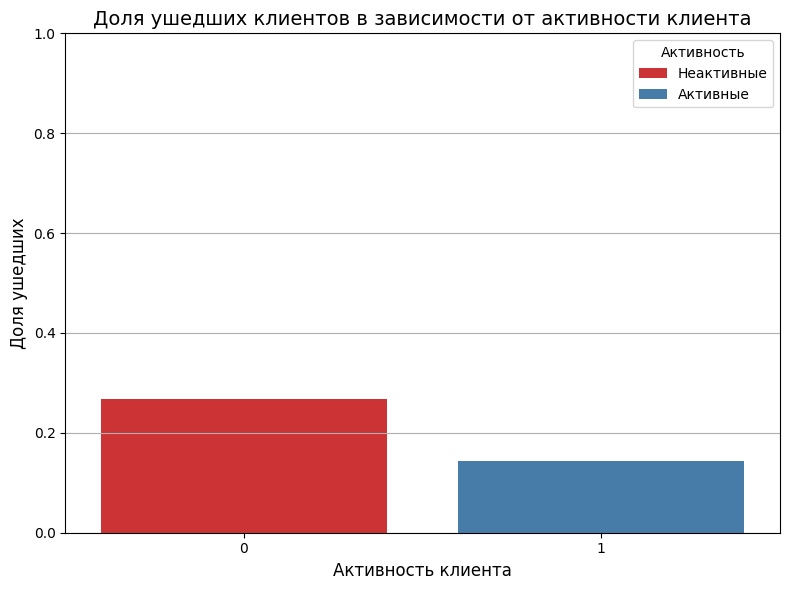

In [30]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по признаку активности клиента (IsActiveMember)
# и рассчитываем среднее значение по признаку оттока (Exited),
# что фактически представляет собой долю ушедших клиентов
active_churn_rate = churn_df.groupby('IsActiveMember')['Exited'].mean().reset_index()

# Переименовываем столбцы для отображения на графике
active_churn_rate.columns = ['Активность', 'Доля ушедших клиентов']

# Создаём график с заданным размером
plt.figure(figsize=(8, 6))

# Строим столбчатую диаграмму по активности клиента
isactivemember_exited = sns.barplot(
    data=active_churn_rate,        # Используем агрегированные данные
    x='Активность',                # Ось X — активность клиента (0 или 1)
    y='Доля ушедших клиентов',     # Ось Y — доля клиентов, ушедших
    hue='Активность',              # Цветовая разбивка по активности
    palette='Set1'                 # Цветовая палитра
)

# Добавляем заголовок и подписи осей
isactivemember_exited.set_title('Доля ушедших клиентов в зависимости от активности клиента', fontsize=14)
isactivemember_exited.set_ylabel('Доля ушедших', fontsize=12)
isactivemember_exited.set_xlabel('Активность клиента', fontsize=12)

# Ограничиваем ось Y значениями от 0 до 1
isactivemember_exited.set_ylim(0, 1)

# Добавляем горизонтальную сетку
isactivemember_exited.grid(axis='y')

# Обновляем легенду с читаемыми подписями
handles, labels = isactivemember_exited.get_legend_handles_labels()
isactivemember_exited.legend(
    handles=handles,
    labels=['Неактивные', 'Активные'],
    title='Активность',
    loc='upper right'
)

# Автоматическая подгонка элементов графика
plt.tight_layout()

# Отображаем итоговый график
plt.show()

Доля ушедших клиентов среди неактивных составляет примерно 28%, в то время как среди активных клиентов эта доля существенно ниже — около 15%. Это свидетельствует о том, что неактивные клиенты уходят из банка чаще, чем активные.

Чтобы снизить отток среди неактивных клиентов, банк может разработать стратегии для повышения вовлеченности. Это могут быть персонализированные предложения, бонусы за активность, улучшение клиентского сервиса или даже внедрение программ лояльности, которые стимулируют клиентов пользоваться услугами банка более активно.

#**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [31]:
# Импортируем необходимые библиотеки
import pandas as pd
import plotly.express as px

# Группируем данные по странам (Geography) и рассчитываем среднее значение по оттоку клиентов (Exited),
# что представляет собой долю ушедших клиентов в каждой стране
churn_by_country = churn_df.groupby('Geography')['Exited'].mean().reset_index()

# Переименовываем столбцы для удобства отображения
churn_by_country.columns = ['Страна', 'Доля ушедших клиентов']

# Строим карту хлороплета с использованием Plotly
geography_exited = px.choropleth(
    churn_by_country,               # Используем агрегированные данные
    locations='Страна',             # Столбец с названиями стран
    locationmode='country names',   # Режим поиска стран по их названиям
    color='Доля ушедших клиентов',  # Используем долю ушедших клиентов для цветового отображения
    hover_name='Страна',            # Показываем страну при наведении
    color_continuous_scale='Viridis', # Цветовая палитра для отображения значения
    labels={'Доля ушедших клиентов': 'Доля ушедших клиентов'},  # Лейбл для оси
    title="Доля ушедших клиентов по странам",  # Заголовок карты
    width=800,                      # Ширина карты
    height=500                      # Высота карты
)

# Отображаем карту
geography_exited.show()

На основе данных, доля ушедших клиентов больше всего в Германии (32%), что значительно выше по сравнению с Францией (16%) и Испанией (17%).

Причиной этому может быть то, что в Германии возможно выше конкуренция среди банков, что побуждает клиентов искать лучшие предложения в других местах. Можно предположить, что в Германии клиенты более требовательны и чувствительны к изменениям условий обслуживания, и это может приводить к большему количеству уходов. Также мы можем допустить, что в отличие от Франции и Испании, в Германии, существует проблема с качеством обслуживания клиентов. Это может быть связано с недостаточной персонализацией сервиса, неудовлетворительными условиями кредитования или недостаточной поддержкой клиентов. Банки в Германии могут использовать другие маркетинговые стратегии, которые меньше направлены на удержание клиентов, в отличие от банков во Франции и Испании, где удержание клиентов может быть более приоритетным.

Банкам в Германии стоит сосредоточиться на улучшении качества обслуживания, персонализированном подходе к клиентам, предложении лучших условий и разработке программ лояльности, которые могут помочь удержать клиентов и послужить эффективным методом снижения оттока. Следует проанализировать предложения конкурентов, чтобы оценить, не уходят ли клиенты из-за более выгодных условий, предлагаемых другими учреждениями.

#**9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

In [18]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

#**Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**

#**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

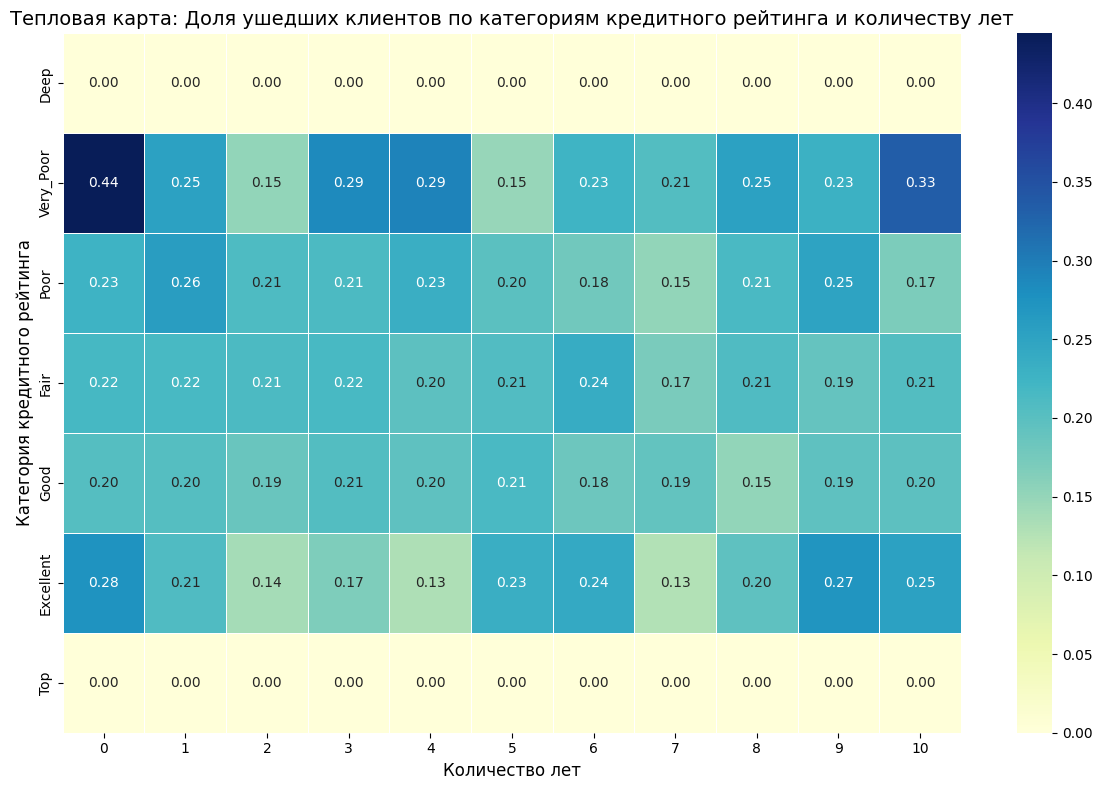

In [32]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для определения категории кредитного рейтинга по числовому значению
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"  # Очень плохой
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"  # Плохой
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"  # Средний
    elif credit_score >= 661 and credit_score < 781:
        return "Good"  # Хороший
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"  # Отличный
    elif credit_score >= 851:
        return "Top"  # Лучший
    elif credit_score < 300:
        return "Deep"  # Глубокий (очень плохой)

# Применяем функцию к столбцу 'CreditScore' и создаем новый столбец 'CreditScoreCat'
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

# Строим сводную таблицу для анализа оттока клиентов по категориям кредитного рейтинга и количеству лет
creditscorecat_tenure = churn_df.pivot_table(
    index='CreditScoreCat',  # Индекс (категория кредитного рейтинга)
    columns='Tenure',         # Столбцы (количество лет)
    values='Exited',          # Значения (отток клиентов)
    aggfunc='mean',           # Аггрегируем по среднему значению
    fill_value=0              # Заполняем пропуски нулями
)

# Устанавливаем порядок категорий для лучшего восприятия
order = ["Deep", "Very_Poor", "Poor", "Fair", "Good", "Excellent", "Top"]
creditscorecat_tenure = creditscorecat_tenure.reindex(order, fill_value=0)

# Настроим размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту для визуализации данных
heatmap_credit_tenure = sns.heatmap(
    creditscorecat_tenure,      # Данные для отображения
    annot=True,                 # Показать значения в клетках
    cmap='YlGnBu',              # Цветовая палитра
    fmt='.2f',                  # Формат чисел в клетках
    linewidths=0.5              # Толщина линий между клетками
)

# Настроим заголовок и подписи осей
heatmap_credit_tenure.set_title('Тепловая карта: Доля ушедших клиентов по категориям кредитного рейтинга и количеству лет', fontsize=14)
heatmap_credit_tenure.set_xlabel('Количество лет', fontsize=12)
heatmap_credit_tenure.set_ylabel('Категория кредитного рейтинга', fontsize=12)

# Обеспечиваем правильное отображение графика
plt.tight_layout()

# Отображаем график
plt.show()

Клиенты с самой высокой долей оттока:

Категория "Very_Poor" (очень плохой кредитный рейтинг).

Особенно на 0-м и 10-м году пользования услугами:

0 лет — 44,4% ушедших,

10 лет — 33,3% ушедших.

Это логично: клиенты с низким кредитным рейтингом менее надёжны и чаще уходят.

Категория "Poor" (плохой кредитный рейтинг) — тоже высокая доля оттока, особенно в первый год (25,9%).

Неожиданный момент:

Даже в категории "Excellent" иногда наблюдается высокий отток:

0 лет — 27,5%,

5 лет — 23,3%,

10 лет — 25,5%.

Это странно, ведь клиенты с хорошими рейтингами обычно более лояльные. Вероятно, тут влияют другие факторы: неудовлетворённость сервисом, выгодные предложения конкурентов, недовольство условиями банка.

Категории "Deep" и "Top":

Оттока нет (0%).

Но важно понимать, что, скорее всего, просто нет данных по таким клиентам (как ты видел — в этих категориях мало или вообще нет клиентов).

Тенденция по стажу пользования услугами (Tenure):

В первый год у всех категорий наблюдается достаточно высокий отток.

По мере увеличения стажа (Tenure 4-7 лет) отток чаще всего снижается.

На 10 году у некоторых категорий снова растёт отток (например, "Very_Poor", "Excellent").

Рекомендации по снижению оттока клиентов:

Для клиентов "Very_Poor" и "Poor":

Предлагать улучшенные условия по кредитам после выполнения минимальных требований (например, своевременные платежи 6 месяцев подряд).

Запустить программы финансового обучения и поддержки.

Для новых клиентов (Tenure 0–1 год):

Укреплять лояльность через бонусные программы, кэшбеки, бесплатные консультации.

Улучшить процесс "введения" новых клиентов в экосистему банка.

Для "Excellent" клиентов:

Персонализировать предложения (VIP-поддержка, премиальные карты, выгодные инвестиционные продукты).

Следить за конкурентоспособностью ставок и условий — такие клиенты легко уйдут к конкуренту.